In [1]:
import sys
import importlib
lib_path = "/Users/leqiang/DeltaFi/code/V2_Simulation"
if lib_path not in sys.path:
    sys.path.append(lib_path)
    print(sys.path)

import lib.price_data as price_data
importlib.reload(price_data)
import matplotlib.pyplot as plt

['/Users/leqiang/DeltaFi/code/V2_Simulation/notebooks', '/Users/leqiang/.vscode/extensions/ms-toolsai.jupyter-2022.3.1000901801/pythonFiles', '/Users/leqiang/.vscode/extensions/ms-toolsai.jupyter-2022.3.1000901801/pythonFiles/lib/python', '/opt/local/Library/Frameworks/Python.framework/Versions/3.9/lib/python39.zip', '/opt/local/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9', '/opt/local/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/lib-dynload', '', '/Users/leqiang/Library/Python/3.9/lib/python/site-packages', '/opt/local/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages', '/Users/leqiang/DeltaFi/code/V2_Simulation']


0.08302034054848412


(array([8.886e+03, 8.673e+03, 8.842e+03, ..., 1.000e+00, 0.000e+00,
        1.000e+00]),
 array([0.00000000e+00, 2.49738489e-02, 4.99476977e-02, ...,
        2.49688541e+02, 2.49713515e+02, 2.49738489e+02]),
 <BarContainer object of 10000 artists>)

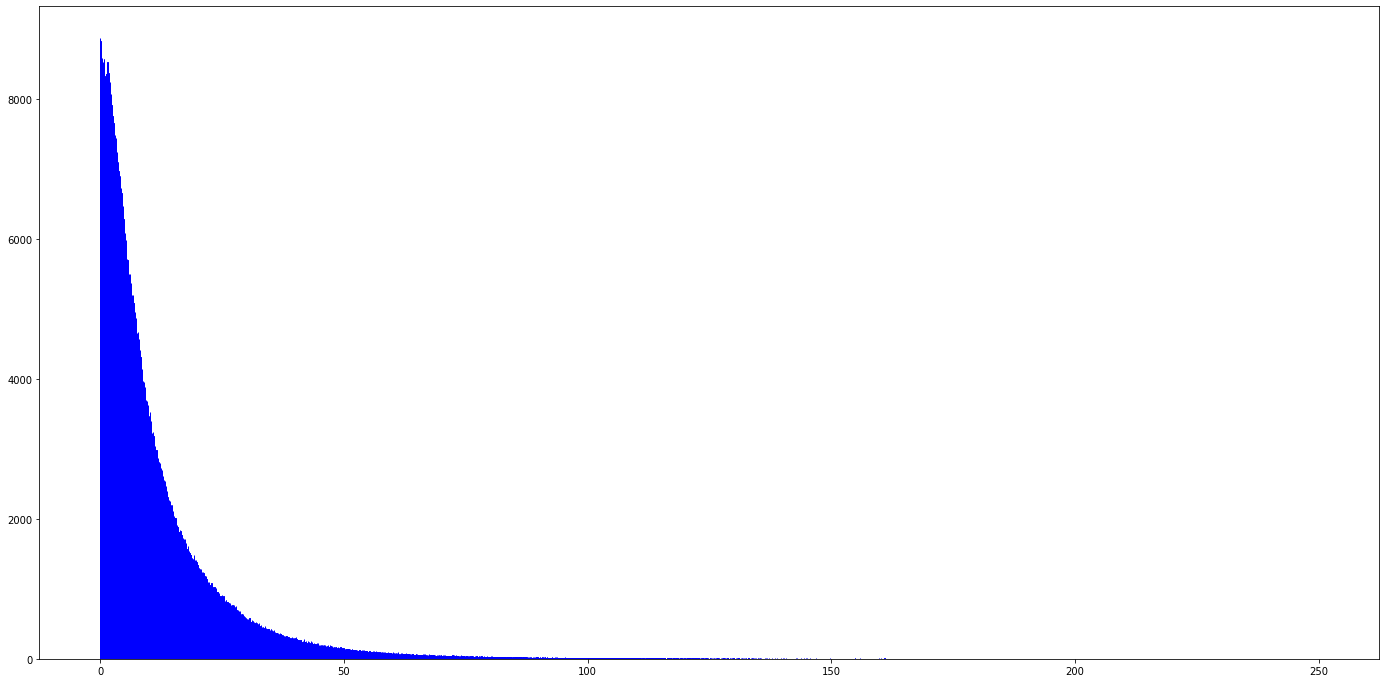

In [10]:
from lib.price_data import get_pyth_confidence_interval_history, get_pyth_twap_history, get_pyth_price_history

confidence_interval_history = get_pyth_confidence_interval_history()
pyth_twap_history = get_pyth_twap_history()
pyth_price_history = get_pyth_price_history()

assert(len(pyth_twap_history) == len(pyth_price_history) == len(confidence_interval_history))

price_twap_diff_history = []

for i in range(len(pyth_price_history)):
    price_twap_diff_history.append(abs(pyth_price_history[i] - pyth_twap_history[i]) / pyth_price_history[i])

print(max(price_twap_diff_history))

price_twap_diff_to_conf_interval_history = []

for i in range(len(price_twap_diff_history)):
    ratio = price_twap_diff_history[i] / confidence_interval_history[i]
    if ratio > 250:
        continue
    price_twap_diff_to_conf_interval_history.append(ratio)

# max_diff_ratio = max(price_twap_diff_to_conf_interval_history)
# idx = price_twap_diff_to_conf_interval_history.index(max_diff_ratio)

# print(pyth_twap_history[idx])
# print(pyth_price_history[idx])
# print(confidence_interval_history[idx])

plt.figure(figsize = (24,12))
plt.hist(price_twap_diff_to_conf_interval_history, color = 'blue', edgecolor = 'blue', bins=10000) 
